In [1]:
import sys

# Add the folder where pip installed the scripts
sys.path.append(r"C:\Users\LENOVE\AppData\Roaming\Python\Python312\Scripts")


In [2]:
!python -m pip install --user gradio


In [3]:
!pip install gradio

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [5]:
!C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip
!C:\ProgramData\anaconda3\python.exe -m pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [7]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Is GPU available?", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.1
Is GPU available? []


In [9]:
# Optional: Uncomment if running in Colab
# !pip install tensorflow gradio

import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [10]:
df = pd.read_excel("D:/Kaggle datasets/AI_Human.xlsx")
print(df.columns)

Index(['text', 'generated'], dtype='object')


In [13]:
df = pd.read_excel("D:/Kaggle datasets/AI_Human.xlsx").dropna()
df['generated'] = df['generated'].astype(int)

def preprocess(text):
    text = str(text).lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text'] = df['text'].apply(preprocess)

# Show first 10 rows
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       487235 non-null  object
 1   generated  487235 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 5.6+ MB


In [15]:
# Split data
X = df['text']
y = df['generated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data Split Summary")
print("----------------------")
print("Total Samples       :", len(X))
print("Training Samples    :", len(X_train))
print("Testing Samples     :", len(X_test))
print("Training Class Distribution:\n", y_train.value_counts())
print("Testing Class Distribution:\n", y_test.value_counts())

✅ Data Split Summary
----------------------
Total Samples       : 487235
Training Samples    : 389788
Testing Samples     : 97447
Training Class Distribution:
 generated
0    244685
1    145103
Name: count, dtype: int64
Testing Class Distribution:
 generated
0    61112
1    36335
Name: count, dtype: int64


In [17]:
# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("✅ TF-IDF Vectorization Result")
print("--------------------------------")
print("Training Data Shape:", X_train_vec.shape)
print("Testing Data Shape :", X_test_vec.shape)

print("\nSample TF-IDF Features (words):")
print(vectorizer.get_feature_names_out()[:20])  # First 20 feature words



✅ TF-IDF Vectorization Result
--------------------------------
Training Data Shape: (389788, 5000)
Testing Data Shape : (97447, 5000)

Sample TF-IDF Features (words):
['aa' 'aad' 'aae' 'ab' 'abd' 'abe' 'abilities' 'ability' 'able' 'abolish'
 'abolished' 'abolishing' 'about' 'above' 'absence' 'absent' 'absolute'
 'absolutely' 'abuse' 'ac']


In [18]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)

# Accuracy calculation
lr_train_acc = accuracy_score(y_train, lr.predict(X_train_vec))
lr_test_acc = accuracy_score(y_test, lr.predict(X_test_vec))

# Print accuracy
print("✅ Logistic Regression Model Accuracy Report")
print("--------------------------------------------")
print("Training Accuracy :", round(lr_train_acc * 100, 2), "%")
print("Testing Accuracy  :", round(lr_test_acc * 100, 2), "%")

from sklearn.metrics import accuracy_score
from scipy.sparse import vstack # Import vstack for concatenating sparse matrices

# Combine train and test data
# Use vstack to concatenate sparse matrices
X_total = vstack([X_train_vec, X_test_vec])
y_total = np.concatenate([y_train, y_test])

# Predict on combined data
y_total_pred = lr.predict(X_total)
model_total_acc = accuracy_score(y_total, y_total_pred)

# Print model accuracy
print(f"📌 Overall Model Accuracy (Train + Test): {round(model_total_acc * 100, 2)}%")

✅ Logistic Regression Model Accuracy Report
--------------------------------------------
Training Accuracy : 99.42 %
Testing Accuracy  : 99.37 %
📌 Overall Model Accuracy (Train + Test): 99.41%


In [19]:

from scipy.sparse import vstack # Import vstack for concatenating sparse matrices

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Predict
nb_train_preds = nb.predict(X_train_vec)
nb_test_preds = nb.predict(X_test_vec)

# Accuracy
nb_train_acc = accuracy_score(y_train, nb_train_preds)
nb_test_acc = accuracy_score(y_test, nb_test_preds)

# Overall Model Accuracy (Train + Test combined)
# Use vstack for concatenating sparse matrices
X_total = vstack([X_train_vec, X_test_vec])
y_total = np.concatenate([y_train, y_test]) # np.concatenate is fine for the y arrays as they are numpy arrays
nb_total_preds = nb.predict(X_total)
nb_model_acc = accuracy_score(y_total, nb_total_preds)

# Print Model Accuracy
print("✅ Naive Bayes Model Accuracy Report")
print("-------------------------------------")
print("Training Accuracy :", round(nb_train_acc * 100, 2), "%")
print("Testing Accuracy  :", round(nb_test_acc * 100, 2), "%")
print(f"📌 Overall Model Accuracy (Train + Test): {round(nb_model_acc * 100, 2)}%")

✅ Naive Bayes Model Accuracy Report
-------------------------------------
Training Accuracy : 95.08 %
Testing Accuracy  : 95.0 %
📌 Overall Model Accuracy (Train + Test): 95.07%


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9936683530534547


In [24]:
# --- Evaluation Summary ---
print("Logistic Regression: Train =", round(lr_train_acc, 4), ", Test =", round(lr_test_acc, 4))
print("Naive Bayes: Train =", round(nb_train_acc, 4), ", Test =", round(nb_test_acc, 4))
print("Neural Network: Not available (memory issue)")


Logistic Regression: Train = 0.9942 , Test = 0.9937
Naive Bayes: Train = 0.9508 , Test = 0.95
Neural Network: Not available (memory issue)


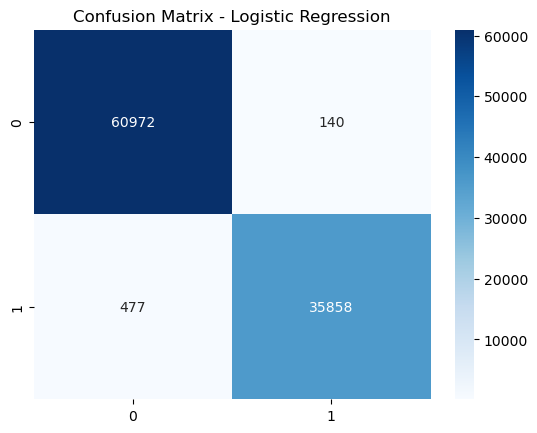

In [25]:

# --- Confusion Matrix Example ---
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_vec)), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

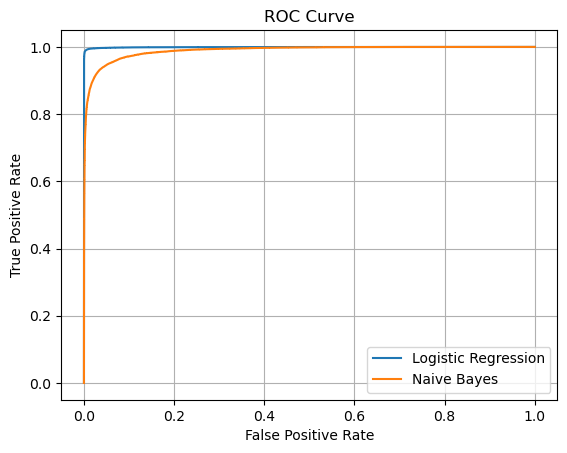

In [30]:

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
# plt.plot(fpr_nn, tpr_nn, label='Neural Network')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# --- Gradio Deployment using Neural Network ---
def detect_text_nn(input_text):
    clean_text = preprocess(input_text)
    vec = vectorizer.transform([clean_text])
    vec_array = vec.toarray()
    prediction = np.argmax(nn.predict(vec_array), axis=1)[0]
    return "AI-Generated Text" if prediction == 1 else "Human-Written Text"

gr.Interface(
    fn=detect_text_nn,
    inputs=gr.Textbox(lines=5, placeholder="Paste or type your text here..."),
    outputs="text",
    title="AI vs Human Text Detector (Neural Network)",
    description="This tool uses a trained Neural Network model to detect whether the given text is written by a Human or generated by AI like ChatGPT."
).launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\LENOVE\AppData\Roaming\Python\Python312\site-packages\gradio\queueing.py", line 745, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVE\AppData\Roaming\Python\Python312\site-packages\gradio\route_utils.py", line 349, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVE\AppData\Roaming\Python\Python312\site-packages\gradio\blocks.py", line 2123, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVE\AppData\Roaming\Python\Python312\site-packages\gradio\blocks.py", line 1630, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\anyio\to_thread.py", line 5